# Bokeh

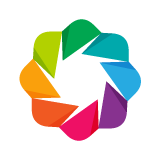

https://bokeh.org/

Bokeh es una liberería de código abierto para crear visualizaciones interactivas para navegadores web modernos.

Con Bokeh, se puede usar Python para crear visualizaciones de datos bellas, desde gráficos simples hasta tableros complejos con conjuntos de datos en tiempo real. 

Bokeh permite crear visualizaciones basadas en **JavaScript** (sin tener que escribir JavaScript).

Bokeh puede generar [objetos HTML independientes](https://docs.bokeh.org/en/latest/docs/user_guide/output/embed.html) para se usados en cualquier tipo de sitio web, o se puede ejecutar Bokeh como servidor. 

Bokeh también funciona directamente en Jupyter Notebooks.

## Instalación
Con pip:

`pip install bokeh`


Con conda:

`conda install bokeh`


In [ ]:
# ! pip install bokeh

## Ejecución de Bokeh en notebooks clásicos
Bokeh soporta ejecución en el notebook Jupyter clásico sin ninguna configuración adicional.

Para habilitar la salida de Bokeh directamente en una celda del notebook, solo necesita importar y llamar a la función output_notebook():

In [ ]:
from bokeh.io import output_notebook

output_notebook()

## Componentes de Bokeh
Bokeh permite usar Python para crear visualizaciones interactivas que se ejecutan en un navegador web. 
Para que esto sea posible, Bokeh incluye una librería JavaScript BokehJS, que es responsable de representar las visualizaciones en el navegador.

Cuando se crea una visualización con Bokeh en Python, Bokeh convierte esta visualización en un archivo JSON. 
Luego, este archivo JSON se envía a BokehJS y BokehJS representa la visualización en el navegador.

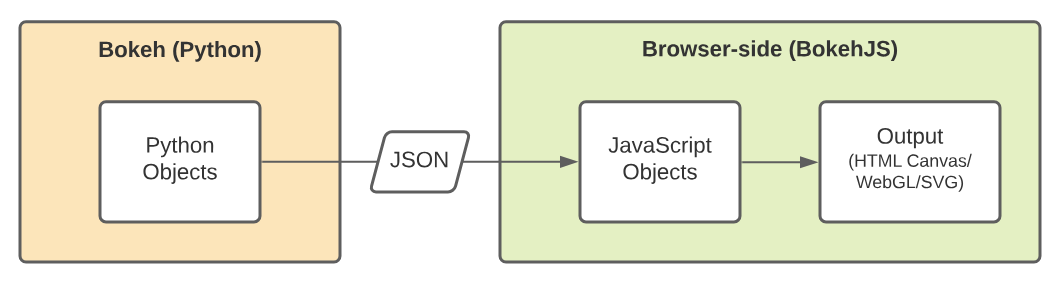

### Bloques de construcción
En el nivel más general, todas las visualizaciones de Bokeh se denominan documentos. Un documento de Bokeh puede contener muchos elementos diferentes. Los bloques de construcción más comunes de un documento de Bokeh son: Plots, Glyphs, Widgets, Layouts

#### Plots
El elemento más común en una visualización de Bokeh es un gráfico. Un gráfico es una representación gráfica de datos. Consta de elementos como glifos (glyphs), ejes, leyendas y anotaciones:

In [ ]:
from bokeh.plotting import figure, show

# generate some values
x = list(range(1, 50))
y = [pow(x, 2) for x in x]

# create a new plot
p = figure()
# add a line renderer and legend to the plot
p.line(x, y, legend_label="Temp.")

# show the results
show(p)

Los gráficos de Bokeh pueden contener herramientas interactivas en una barra de herramientas. De forma predeterminada, se incluyen las siguientes herramientas:

- Pan: desplaza el gráfico horizontal y verticalmente.
- Zoom de cuadro: acerca o aleja el gráfico seleccionando un área rectangular.
- 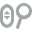Zoom de rueda: acerca o aleja el gráfico utilizando la rueda del ratón.
- Guardar: guarda el gráfico como archivo PNG.
- Reset: restablece el gráfico a su estado original.
- Ayuda: abre una página de ayuda con información sobre las herramientas disponibles en Bokeh.

#### Glyphs
Un glifo es una representación visual de los datos. 
- En el ejemplo anterior, la línea que representa los datos x e y es un glifo de línea. 

Bokeh admite muchos tipos diferentes de glifos para usar dentro de los gráficos. Algunos ejemplos de glifos son los dispersos, las cuñas, las barras o los mosaicos.

#### Widgets
Además de los gráficos, también puede agregar widgets a su visualización. Los widgets son elementos interactivos que le permiten controlar o automatizar aspectos de su visualización.

El siguiente ejemplo crea un widget de control deslizante para definir un rango de fechas:

In [ ]:
from bokeh.models import DateRangeSlider

date_range_slider = DateRangeSlider(
    value=("2022-10-01", "2022-12-31"),
    start="2022-07-01",
    end="2023-03-31",
)

show(date_range_slider)

#### Layouts
Un documento puede constar de un único gráfico o combinar varios gráficos y widgets para crear una visualización más compleja (layout). 
Bokeh ofrece varias opciones de layouts diferentes para organizar los gráficos y widgets en un documento.

In [ ]:
from bokeh.layouts import row
from bokeh.plotting import figure, show

# prepare some data
x = list(range(11))
y0 = x
y1 = [10 - i for i in x]
y2 = [abs(i - 5) for i in x]

# create three plots with one renderer each
s1 = figure(width=250, height=250, background_fill_color="#fafafa")
s1.scatter(x, y0, size=12, color="#53777a", alpha=0.8, marker="circle")

s2 = figure(width=250, height=250, background_fill_color="#fafafa")
s2.scatter(x, y1, size=12, color="#c02942", alpha=0.8, marker="triangle")

s3 = figure(width=250, height=250, background_fill_color="#fafafa")
s3.scatter(x, y2, size=12, color="#d95b43", alpha=0.8, marker="square")

# put the results in a row and show
show(row(s1, s2, s3))

## Plotting básico

Todos los gráficos basados ​​en la interfaz **bokeh.plotting** utilizan la función **figure()** para crear un nuevo gráfico.
- Crea una nueva gráfica con la función figure(): **plot = figure()**
- Agregar varios argumentos opcionales a la función figure(). 
    - Ej, altura y ancho del gráfico:

In [19]:
from bokeh.plotting import figure
plot = figure(height=300, width=300)

### Glifo de línea
- Usar la función **line()**.

In [ ]:
# datos
x = [1, 2, 3, 4, 5]
y = [6, 7, 2, 1, 5]

# usar line() para crear un gráfico con los datos
plot.line(x, y)

# mostrar el gráfico
from bokeh.plotting import show

show(plot)

In [ ]:
from bokeh.plotting import figure, show

# parmámetros del gráfico
plot = figure(
    height=300,
    width=300,
    title='Basic Line Plot',
    x_axis_label='x',
    y_axis_label='y'
)

x = [1, 2, 3, 4, 5]
y = [6, 7, 2, 1, 5]

# parmámetros de linea: prueba a cambiar valores
plot.line(
    x,
    y,
    legend_label="Temperature",
    line_width=2,
    line_color="red",
)

show(plot)

#### Un ejemplo más real

In [ ]:
import pandas as pd

import data.carriers_data as datasrc

ds = datasrc.CarrierDataSet()
monthly_values_df = ds.get_monthly_values()
monthly_values_df.head(5)

In [ ]:
plot = figure(
    height=300,
    width=600,
    title="Domestic Airline Passengers (2021)",
)

x = monthly_values_df.index  # x-axis is the number of the month
y = monthly_values_df["passengers"]  # y-axis is the number of passengers

plot.line(
    x,
    y,
    legend_label="Passengers",
    line_width=3,
    line_color="blue",
)

show(plot)

### Diagramas de dispersión
- Crear una nueva figura con la función figure().
- Agreguar los puntos del diagrama de dispersión a la figura con la función glifo de dispersión.
- Muestrar el gráfico con la función show().

In [ ]:
p = figure(width=400, height=200)

p.scatter([1, 2, 3, 4, 5], [6, 7, 2, 4, 5], size=15)

show(p) 

Para cambiar las formas que representan los puntos especificar el tipo de marcador para una forma de glifo de dispersión diferente. El valor predeterminado es círculo.

In [ ]:
p = figure(width=400, height=200)
x = [1, 2, 3, 4, 5]
y = [6, 7, 2, 4, 5]

# 🔁 usar uno de los diferentes tipos de marcadores para ver qué hacen
p.scatter(x, y, size=15, color="red", alpha=0.5, marker="triangle")
# p.scatter(x, y, size=15, color="yellow", alpha=0.5, marker="triangle_dot")
# p.scatter(x, y, size=15, color="pink", alpha=0.5, marker="square")
# p.scatter(x, y, size=15, color="blue", alpha=0.5, marker="square_dot")
# p.scatter(x, y, size=15, color="green", alpha=0.5, marker="square_cross")
# p.scatter(x, y, size=15, color="maroon", alpha=0.5, marker="square_pin")
# p.scatter(x, y, size=15, color="orange", alpha=0.5, marker="asterisk")

show(p)  # show the results

#### Combinando glifos en un solo diagrama

Todo lo que se necesitas hacer es llamar a múltiples funciones de glifo en la misma figura:


In [ ]:
plot = figure(height=300, width=300)
x = [1, 2, 3, 4, 5]
y = [6, 7, 2, 1, 5]

# agregar un gráfico de líneas al gráfico
plot.line(x, y)

# agregar marcadores de dispersión al gráfico
plot.scatter(x, y, size=15, color="red", alpha=0.5, marker="circle_dot")

show(plot)

### Datos categóricos en gráficos de barras
Los gráficos de barras representan datos para diferentes categorías como barras verticales u horizontales.

En los ejemplos hasta ahora, ha utilizado un rango continuo para el eje x. Los gráficos de barras son una excelente manera de visualizar datos categóricos. Esto significa que el eje x no es un rango continuo sino un conjunto de categorías discretas. Por ejemplo, una lista de países o una lista de diferentes productos.

En el siguiente ejemplo, creará un gráfico de barras que muestra un recuento de diferentes tipos de frutas.

Las diferentes frutas son las categorías. Para utilizar categorías en lugar de un rango continuo de números, la función figure() tiene un parámetro llamado x_range. Aquí es donde pasa la lista de frutas.

La función glyph para barras verticales se llama vbar(). La altura de las barras está determinada por el parámetro top. El parámetro x determina a qué categoría pertenece la barra.

In [ ]:
fruits = ["Apples", "Pears", "Nectarines", "Plums",
          "Grapes", "Strawberries"]  # categorías
counts = [5, 3, 4, 2, 4, 6]

# define las categorías en el eje x
p = figure(x_range=fruits, height=350, title="Fruit Counts")

p.vbar(x=fruits, top=counts, width=0.9, color="firebrick")

show(p)

In [ ]:
## Ejemplo pasajeros
airlines_by_passengers_df = ds.get_biggest_airlines_by_passengers()
airlines_by_passengers_df.head()

In [ ]:
carriers_by_passengers_plot = figure(
    x_range=airlines_by_passengers_df["unique_carrier_name"][:10],  # use only the top ten carriers
    title="Top 10 carriers by passengers (domestic routes)",
    height=300,
    width=600,
)
carriers_by_passengers_plot.vbar(
    x=airlines_by_passengers_df["unique_carrier_name"],
    top=airlines_by_passengers_df["passengers"],
    legend_label="Passengers",
    width=0.6,
)

carriers_by_passengers_plot.xaxis.major_label_orientation = 0.8  # rotate labels by roughly pi/4

show(carriers_by_passengers_plot)

### Más gráficos: https://docs.bokeh.org/en/latest/docs/gallery.html


## Dar estilo

### Colores en Bokeh
La definición de colores funciona de la misma manera en todas las partes de Bokeh. Existen diferentes formas de definir colores, incluidas las siguientes:

- cualquiera de los 140 colores HTML/CSS nombrados, p. ej., "verde", "índigo"
- un valor hexadecimal RGB(A), p. ej., "#FF0000", "#44444444"
- una tupla de 3 números enteros (r,g,b) entre 0 y 255
- una tupla de 4 números (r,g,b,a) donde r, g, b son números enteros entre 0 y 255 y a es un valor de punto flotante entre 0 y 1


In [ ]:
from bokeh.plotting import figure, show

fruits = ["Apples", "Pears", "Nectarines", "Plums", "Grapes", "Strawberries"]  # a set of categories
counts = [5, 3, 4, 2, 4, 6]

color_plot = figure(x_range=fruits, height=350)

# Prueba diferentes formas de definir el color de la vbar descomentando una de las siguientes líneas:
color_plot.vbar(x=fruits, top=counts, width=0.9, color="indigo")  # using a named CSS color
# color_plot.vbar(x=fruits, top=counts, width=0.9, color="#00FF00")  # using a hex color
# color_plot.vbar(x=fruits, top=counts, width=0.9, color=(0, 100, 100))  # using a RGB color
# color_plot.vbar(x=fruits, top=counts, width=0.9, color=(0, 100, 100, 0.25))  # using a RGBA color

show(color_plot)

### Propiedades visuales
Todos los elementos de una visualización de Bokeh son objetos de Python. Puede personalizar su apariencia configurando las propiedades de estos objetos.
https://docs.bokeh.org/en/latest/docs/user_guide/styling/visuals.html

Las propiedades visuales de Bokeh funcionan de manera similar en diferentes tipos de objetos. Están organizadas en cuatro grupos:

**Propiedades de línea**
- Las propiedades de línea se utilizan para personalizar el aspecto de las líneas, como el color, el grosor y el patrón de trazos.
- Todas las propiedades de línea comienzan con line_. Por ejemplo: line_color, line_alpha, line_width y line_dash.

**Propiedades de texto**
- Las propiedades de texto se utilizan para cambiar la apariencia del texto, como la fuente, el tamaño y el color.
- Todas las propiedades de texto comienzan con text_. Por ejemplo: text_font, text_font_size, text_color y text_alpha.

**Propiedades de relleno**
- Las propiedades de relleno se utilizan para cambiar el color y la transparencia de un área rellena.
- Las propiedades de relleno comienzan con fill_. Por ejemplo: fill_color, fill_alpha.

**Propiedades de trama**
- Las propiedades de trama se utilizan para cambiar la apariencia de las tramas, como el color, el patrón y el grosor.
- Las propiedades de trama comienzan con hatch_. Por ejemplo: hatch_color, hatch_alpha, hatch_pattern y hatch_scale.


Veamos las siguientes propiedades visuales en acción:

- text_font_size y text_color (consulte Propiedades de texto para obtener más detalles)
- line_width, line_color, line_alpha y line_dash (consulte Propiedades de línea para obtener más detalles)
- fill_color y fill_alpha (consulte Propiedades de relleno para obtener más detalles)
- hatch_color, hatch_alpha y hatch_pattern (consulte Propiedades de trama para obtener más detalles)

In [ ]:
# definir el plot
visual_properties_plot = figure(
    height=300,
    title="Domestic Freight and Mail (2021)",
)

# cargar datos
monthly_values_df = ds.get_monthly_values()

# usar los datos
x = monthly_values_df.index  # el eje x es el número del mes
freight = monthly_values_df["freight"]  # la cantidad de flete
mail = monthly_values_df["mail"]  # la cantidad de correo

# cambiar el tamaño de fuente del título
# 🔁 intente cambiar los valores de esas propiedades para ver cómo afectan el gráfico
visual_properties_plot.title.text_font_size = "1.2em"  # usar una definición de estilo CSS del tamaño de fuente
visual_properties_plot.title.text_color = "darkblue"  # usar un color CSS con nombre

# agregar un glifo de línea y personalizar su apariencia
# ! intentar cambiar los valores de esas propiedades para ver cómo afectan el gráfico
visual_properties_plot.line(
    x,
    freight,
    line_width=3,
    line_color="orange",
    line_alpha=0.6,
    line_dash="dashed",  # propiedades de línea
)

# agregar un glifo de vbar y personalizar su apariencia
# ! intentar cambiar los valores de esas propiedades para ver cómo afectan el gráfico
visual_properties_plot.vbar(
    x=x,
    top=mail,
    width=0.9,
    fill_alpha=0.5,
    fill_color="navy",  # fill properties
    hatch_pattern="spiral",
    hatch_alpha=0.5,
    hatch_color="yellow",  # hatch properties
)

show(visual_properties_plot)

### Estilos  de gráficos
Se puede definir la apariencia de muchos elementos de un gráfico. Esto incluye, por ejemplo, el ancho y la altura, el contorno, el borde o el fondo del gráfico.

En la mayoría de los casos, la personalización de la apariencia de un elemento de un gráfico utiliza propiedades que funcionan igual que las propiedades visuales que se utilizaron en los ejemplos anteriores.

In [ ]:
lot = figure()

# ! Probar a cambiar los valores de las siguientes propiedades para ver cómo afectan al gráfico
plot.height = 300  # establece la altura del gráfico (en píxeles)
plot.width = 700  # establece el ancho del gráfico (en píxeles)
plot.outline_line_color = "navy"  # usa un color CSS para el contorno del gráfico
plot.outline_line_width = 2  # establece el ancho del contorno
plot.outline_line_alpha = 0.5  # establece la transparencia del contorno
plot.background_fill_color = "lightblue"  # establece un color de fondo
plot.xgrid.grid_line_color = None  # haz que las líneas de la cuadrícula del eje x sean invisibles

plot.scatter([1, 2, 3, 4, 5], [2, 5, 8, 2, 7], size=10)

show(plot)

### Estilos de los glifos
Como probablemente ya hayas visto, hay dos formas de definir las propiedades de los elementos de un gráfico:

- Puedes configurar las propiedades del glifo cuando lo defines por primera vez. Por ejemplo:

    `plot.scatter(x, y, fill_color='yellow', line_color='red')`

- O puedes configurar las propiedades del glifo después de haberlo definido. 
    - Para acceder a las propiedades visuales de un glifo después de definirlo por primera vez, utiliza el atributo .glyph. Por ejemplo:

    ```
    circle = plot.scatter(x, y)
    circle.glyph.fill_color = 'green'
    circle.glyph.line_color = 'blue'
    ```

In [ ]:
plot = figure(height=300)

# add a circle glyph and define its colors to be "yellow" and "red"
circle = plot.scatter([1, 2, 3], [2, 5, 8], size=15, fill_color="yellow", line_color="red")
circle.glyph.fill_color = "green"  # use the .glyph attribute to access the visual properties of the glyph
circle.glyph.line_color = "blue"

show(plot)

### Personalizar ejes


In [ ]:
axes_plot = figure(height=300)
circle = axes_plot.line([1, 2, 3], [2, 1, 8], line_color="purple")

# ! prueba usar diferentes atributos visuales para cambiar la apariencia del eje x
axes_plot.xaxis.axis_line_color = "blue"  # Establece el color de la línea del eje x
axes_plot.xaxis.minor_tick_line_color = "orange"  # Establece el color de las marcas de graduación del eje x
axes_plot.xaxis.major_tick_line_color = "red"  # Establece el color de las marcas de graduación del eje x
axes_plot.xaxis.major_label_text_font_size = "1.2em"  # Establece el tamaño de fuente de la etiqueta del eje x
axes_plot.yaxis.axis_line_color = "red"  # Establece el color de la línea del eje y

show(axes_plot)

### Personalizar títulos

In [ ]:
from bokeh.plotting import figure, show

x = [1, 2, 3, 4, 5]
y = [6, 7, 2, 4, 5]

titles_plot = figure(title="Headline example", height=300)
titles_plot.line(x, y, line_width=2)

# Prueba a actualizar los siguientes parámetros para ver cómo puedes personalizar el título:
titles_plot.title_location = "left"  # mueve el título hacia la izquierda
titles_plot.title.text = "Updated plot title"  # cambia el texto del título
titles_plot.title.text_font_size = "25px"  # cambia el tamaño de fuente
titles_plot.title.align = "right"  # alinea el título a la derecha
titles_plot.title.background_fill_color = "darkgrey"  # cambia el color de fondo
titles_plot.title.text_color = "white"  # cambia el color del texto

show(titles_plot)

### Personalizar las leyendas

In [ ]:
x = [1, 2, 3, 4, 5]
y1 = [4, 5, 5, 7, 2]
y2 = [2, 3, 4, 5, 6]

legends_plot = figure(title="Legend example")

# agrega un renderizador circular con argumentos legend_label
line = legends_plot.line(
    x,
    y1,
    legend_label="Temperature",
    line_color="blue",
    line_width=2,
)
circle = legends_plot.scatter(
    x,
    y2,
    legend_label="Objects",
    fill_color="red",
    fill_alpha=0.5,
    line_color="blue",
    size=80,
)

# ! prueba cambiar los siguientes parámetros para ver cómo puedes personalizar la leyenda:
# muestra la leyenda en la esquina superior izquierda (el valor predeterminado es la esquina superior derecha)
legends_plot.legend.location = "top_left"

# agrega un título a tu leyenda
legends_plot.legend.title = "Observations"

# cambia la apariencia del texto de la leyenda
legends_plot.legend.label_text_color = "navy"
legends_plot.legend.label_text_font = "times"
legends_plot.legend.label_text_font_style = "italic"

# cambia el borde y el fondo de la leyenda
legends_plot.legend.border_line_width = 3
legends_plot.legend.border_line_color = "navy"
legends_plot.legend.border_line_alpha = 0.8
legends_plot.legend.background_fill_color = "navy"
legends_plot.legend.background_fill_alpha = 0.2

# muestra los resultados
show(legends_plot)

### Color mappers y paletas

Bokeh incluye docenas de paletas de colores predefinidas que puedes usar para asignar colores a tus datos. Esto incluye paletas de ColorBrewer, D3 o Matplotlib (consulta las paletas en la guía de referencia para obtener una lista completa).

Estas paletas están disponibles en el módulo bokeh.palettes. Las paletas son diccionarios con diferentes rangos de colores predefinidos. En muchos casos, puedes acceder a una lista de una cantidad específica de colores usando la cantidad de colores como clave. Por ejemplo:


In [ ]:
from bokeh.palettes import Cividis  # Importar la paleta de colores de Cividis

Cividis[10]  # Utilizar "10" como clave para obtener una lista de 10 colores de la paleta de Cividis

Se puede usar esas listas de colores para asignar colores a sus datos. Esto significa que los valores de color se asignan automáticamente a sus datos en función de los valores de los datos.

Bokeh proporciona diferentes métodos de asignación de colores para hacer esto, incluidos:

- **linear_cmap()**: asigna colores a un rango de valores de forma lineal
- **log_cmap()**: asigna colores a un rango de valores de forma logarítmica

In [ ]:
from bokeh.io import show
from bokeh.plotting import figure
from bokeh.transform import linear_cmap

x = list(range(-32, 33))
y = [i**2 for i in x]

mapper_plot = figure(width=500, height=250)

circle_scatter = mapper_plot.scatter(
    x,
    y,
    color=linear_cmap("y", "Turbo256", min(y), max(y)),
    size=10,
)

show(mapper_plot)

Para proporcionar información sobre qué color corresponde a qué valor numérico, puede agregar una barra de color a su gráfico.

Agregar una barra de color es un proceso de dos pasos:

1. Definir la barra de color con el método construct_color_bar()
2. Agregar la barra de color a la figura. Utilice el método add_layout para agregar el objeto y definir su posición.

In [ ]:
color_bar = circle_scatter.construct_color_bar()  # create a color bar based on the glyph's color mapper
mapper_plot.add_layout(obj=color_bar, place="right")  # add the color bar to the plot you created above

show(mapper_plot)

### Uso de temas
Bokeh tiene una serie de temas integrados que puede utilizar para cambiar rápidamente la apariencia de su gráfico. Los temas son un conjunto de parámetros de diseño predefinidos, como colores, fuentes o estilos de línea.

Bokeh incluye los siguientes temas integrados:

- caliber
- dark_minimal
- light_minimal
- night_sky
- contrast

Se puede aplicar un tema a su documento como un todo. Su documento Bokeh es la combinación de todos los gráficos, widgets y diseños que ha definido. Puede acceder a este documento con la función curdoc().

Para utilizar uno de los temas integrados, asigne el nombre del tema que desea utilizar a la propiedad theme de su objeto curdoc().

In [ ]:
from bokeh.io import curdoc

# ! Prueba diferentes temas
# curdoc().theme = "caliber"
# curdoc().theme = "dark_minimal"
# curdoc().theme = "light_minimal"
curdoc().theme = "night_sky"
# curdoc().theme = "contrast"

x = [1, 2, 3, 4, 5]
y = [4, 5, 5, 7, 2]
themed_plot = figure(sizing_mode="stretch_width", max_width=500, height=250)
themed_plot.line(x, y)

show(themed_plot)

## Anotaciones
Son elementos visuales que agregas a tu trama para proporcionar información adicional.

### De intervalo (Span)

Los intervalos son líneas horizontales o verticales. Puede utilizarlos para resaltar valores específicos en su gráfico. Por ejemplo, puede utilizarlos para resaltar los valores mínimos o máximos de sus datos.

Al igual que la mayoría de las anotaciones de Bokeh, agregar intervalos a su gráfico es un proceso de dos pasos:

- Crea un objeto Span
- Agrega el objeto Span a su gráfico utilizando el método add_layout

In [ ]:
from bokeh.plotting import figure, show
from bokeh.models import NumeralTickFormatter, Span

plot = figure(height=300)

monthly_values_df = ds.get_monthly_values()

x = monthly_values_df.index
passengers = monthly_values_df["passengers"]

# Agrega un glifo de línea y personaliza su apariencia
plot.line(x, passengers, line_width=3, line_color="orange")
plot.yaxis.formatter = NumeralTickFormatter(format="0,0")

max = Span(
    location=monthly_values_df["passengers"].max(),
    dimension="width",
    line_color="red",
    line_width=2,
)
plot.add_layout(max)
min = Span(
    location=monthly_values_df["passengers"].min(),
    dimension="width",
    line_color="blue",
    line_width=2,
)
plot.add_layout(min)

show(plot)

Se puede utilizar las propiedades de línea habituales para personalizar el aspecto de sus tramos. Por ejemplo: line_alpha, line_color o line_dash.

- dimension="width" para un tramo horizontal
- dimension="height" para un tramo vertical

In [ ]:
plot = figure(height=300)
x = monthly_values_df.index
passengers = monthly_values_df["passengers"]

plot.line(x, passengers, line_width=3, line_color="orange")
plot.yaxis.formatter = NumeralTickFormatter(format="0,0")

# Span vertical
max = Span(location=2, dimension="height", line_color="red", line_width=2, line_dash="dashed")
plot.add_layout(max)
min = Span(location=7, dimension="height", line_color="blue", line_width=2, line_dash="dashed")
plot.add_layout(min)

show(plot)

### Etiquetas

#### Manualmente
- **x_offset** e **y_offset** definen el desplazamiento de la etiqueta con respecto a la posición definida por x e y.
- **text_align** define la alineación horizontal del texto. Puede ser izquierda, centro o derecha.
- **text_baseline** define la alineación vertical del texto. Puede ser superior, media o inferior.

In [ ]:
from bokeh.models.annotations import Label
from bokeh.plotting import figure

p = figure(x_range=(0, 10), y_range=(0, 10), height=300)
p.scatter([2, 5, 8], [4, 7, 6], color="olive", size=10)

# primera etiqueta, usando las mismas coordenadas que el círculo (5 en el eje x y 7 en el eje y)
data_label = Label(
    x=5,  # colocar la etiqueta en las mismas coordenadas x que el círculo
    y=7,  # colocar la etiqueta en las mismas coordenadas y que el círculo
    x_offset=12,  # desplazar la etiqueta desde el centro del círculo por 12 píxeles en la dirección x
    text="Maximum",
    text_baseline="middle",  # alinear el texto verticalmente al medio del círculo
    text_color="olive",  # usar una propiedad de texto estándar para el color del texto
)
p.add_layout(data_label)

# segunda etiqueta, ubicada a 5 por 5 píxeles de la esquina inferior izquierda del gráfico
source_label = Label(
    x_units="screen",  # usar unidades de pantalla (píxeles) para la coordenada x
    y_units="screen",  # usar unidades de pantalla (píxeles) para la coordenada y
    x=5,  # dado que usamos unidades de pantalla, estas se miden en píxeles
    y=5,  # dado que usamos unidades de pantalla, estas se miden en píxeles
    text="Source: Bokeh user guide",
    text_font_size="0.7em",
)
p.add_layout(source_label)

show(p)

#### En relación con los puntos de datos
Los datos deben estar en un ColumnDataSource. En lugar de definir valores concretos para las propiedades x e y de una etiqueta, pasar los nombres de columna de la ColumnDataSource:

In [ ]:
from bokeh.models import ColumnDataSource, LabelSet

source = ColumnDataSource(
    data=dict(
        temp=[166, 171, 172, 168, 174, 162],
        pressure=[165, 189, 220, 141, 260, 174],
        names=["A", "B", "C", "D", "E", "F"],
    )
)

p = figure(x_range=(160, 175), height=300)

p.scatter(
    x="temp",  # use la columna de temperatura como coordenadas x
    y="pressure",  # use la columna de presión como coordenadas y
    size=8,
    source=source,
)

p.xaxis.axis_label = "Temperature (C)"
p.yaxis.axis_label = "Pressure (lbs)"

# añadir etiquetas según los datos en ColumnDataSource
labels = LabelSet(
    x="temp",  # use la columna de temperatura como coordenadas x
    y="pressure",  # use la columna de presión como coordenadas y
    text="names",  # use las cadenas de la columna de nombres como texto
    text_baseline="middle",
    x_offset=10,
    source=source,  # use ColumnDataSource como fuente de datos para las posiciones de las etiquetas
)

p.add_layout(labels)

show(p)

### Flechas

Propiedades más importantes de un objeto Arrow:

- x_start e y_start definen el punto inicial de la flecha (en unidades del espacio de datos)
- x_end e y_end definen el punto final de la flecha (en unidades del espacio de datos)
- start y end definen los objetos de punta de flecha al inicio y al final de la flecha.

Se puede elegir entre cuatro tipos diferentes de punta de flecha:

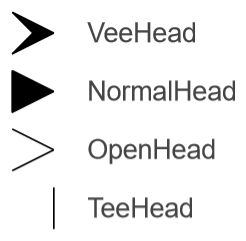

In [ ]:
from bokeh.models import Arrow, NormalHead, OpenHead, VeeHead

plot = figure(height=300)

x = list(range(-100, 100, 1))
y = [pow(i, 2) for i in x]

plot.line(x, y)

arrow = Arrow(
    end=OpenHead(line_color="firebrick", line_width=3),  # prueba a usar OpenHead o VeeHead en lugar de OpenHead
    line_width=3,
    x_start=20,
    y_start=6000,  # el inicio de la flecha, definido en las coordenadas de los datos
    x_end=0,
    y_end=0,  # la punta de la flecha está en el mínimo de la curva
)
plot.add_layout(arrow)

show(plot)

### Barra de escala

In [ ]:
from pathlib import Path
from bokeh.models import MetricLength, ScaleBar

TOOLS = "pan,wheel_zoom,box_zoom,reset"

p = figure(
    tools=TOOLS,
    active_scroll="wheel_zoom",
)

p.x_range.range_padding = 0
p.y_range.range_padding = 0

p.x_range.bounds = (0, 1)
p.y_range.bounds = (0, 1)

pollen_png = Path("assets/pollen.png")
img = pollen_png.read_bytes()

p.image_url(x=0, y=0, w=1, h=1, url=[img], anchor="bottom_left")

scale_bar = ScaleBar(
    range=p.x_range,
    unit="mm",
    dimensional=MetricLength(),
    orientation="horizontal",
    location="top_right",
    label="@{value} @{unit}",
    label_location="above",
    label_align="center",
    bar_length=0.2,
    bar_line_width=2,
    background_fill_alpha=0.8,
)
p.add_layout(scale_bar)

show(p)

## Layouts

Modos de tamaño
Para combinar gráficos en diseños, es importante comprender los modos de tamaño de Bokeh. Los modos de tamaño son una forma de controlar cómo se dimensionan y estiran los gráficos y widgets de Bokeh. Hay tres modos de tamaño básicos:

- modo fijo (fixed): el gráfico o widget tiene un tamaño fijo. El tamaño está determinado por las propiedades de ancho y alto y no cambia.
- modo estirado (stretch): el gráfico o widget se estira para llenar el espacio disponible
- modo de escala (scale): el gráfico o widget se escala para llenar el espacio disponible pero mantiene su relación de aspecto

In [ ]:
from bokeh.plotting import figure, show

x = list(range(1, 50))
y = [pow(x, 2) for x in x]

p = figure(
    height=200,  # prueba a modificar
    width=4000,  # prueba a modificar
    sizing_mode="fixed",
)

p.line(x, y)
show(p)

In [ ]:
x = list(range(1, 50))
y = [pow(x, 2) for x in x]

p = figure(
    height=300,
    width=400,  # Este valor se ignora cuando sizing_mode se establece en "stretch_width"
    sizing_mode="stretch_width",  # Cambia el modo de tamaño del gráfico entre "stretch_width" y "fixed" para ver la diferencia
    # sizing_mode="fixed",
)
# add a line renderer and display the plot
p.line(x, y)
show(p)

In [ ]:
x = list(range(1, 50))
y = [pow(x, 2) for x in x]

p = figure(
    height=100,
    width=400,  # este valor solo se usa para determinar la relación de aspecto cuando sizing_mode está configurado en "scale_width"
    sizing_mode="scale_width",  # cambia el modo de tamaño del gráfico entre scale_width", "stretch_width" y "fixed" para ver la diferencia
    # sizing_mode=""stretch_width"",
    # sizing_mode="fixed",
)

p.line(x, y)
show(p)

### Layouts de cuadrícula y columnas
Hay tres modos de diseño básicos:

- **column**: los gráficos y widgets se organizan verticalmente
- **row**: los gráficos y widgets se organizan horizontalmente
- **layout**: los gráficos y widgets se organizan en una cuadrícula que consta de filas y columnas

In [ ]:
from bokeh.layouts import column, row

x = list(range(1, 50))
y = [pow(x, 2) for x in x]

p1 = figure(height=200, width=400)
p1.line(x, y)

p2 = figure(height=200, width=400)
p2.scatter(x, y, size=10, color="red", alpha=0.5)

# Usar la siguiente línea para crear un diseño de columnas, organizando los gráficos verticalmente
layout = column([p1, p2])
# Descomentar para crear un diseño de filas, organizando los gráficos horizontalmente
# layout = row([p1, p2])

show(layout)

### Grid Layout

In [ ]:
from bokeh.layouts import layout

x = list(range(1, 50))
y = [pow(x, 2) for x in x]

p1 = figure(height=200, width=400, sizing_mode="stretch_width")  # este gráfico se extiende hasta el ancho del layout
p1.line(x, y)

p2 = figure(height=200, width=400, sizing_mode="stretch_width")  # este gráfico se extiende hasta el ancho del layout
p2.scatter(x, y, size=10, color="red", alpha=0.5)

p3 = figure(height=80, width=400, sizing_mode="scale_width")  # este gráfico se escala hasta el ancho del layout, manteniendo su relación de aspecto
p3.scatter(x, y, size=10, color="green", alpha=0.5, marker="square")

# crear un layout
layout = layout(
    [
        [p1, p2],  # la primera fila contiene dos gráficos, espaciados uniformemente a lo largo del ancho del cuaderno
        [p3],  # la segunda fila contiene solo un gráfico, que abarca el ancho del cuaderno
    ],
    sizing_mode="stretch_width",  # el layout en sí se extiende hasta el ancho del cuaderno
)

show(layout)

# Tabs
Una forma alternativa de combinar varios gráficos y widgets en un solo documento es usar pestañas.

Para agregar pestañas a un documento Bokeh, use el objeto Tabs. Este es un widget que permite al usuario cambiar entre diferentes TabPanels.

In [ ]:
from bokeh.models import TabPanel, Tabs

p1 = figure(width=300, height=300)
p1.scatter([1, 2, 3, 4, 5], [6, 7, 2, 4, 5], size=20, color="navy", alpha=0.5)
tab1 = TabPanel(child=p1, title="circle")  # add the first figure to a tab panel

p2 = figure(width=300, height=300)
p2.line([1, 2, 3, 4, 5], [6, 7, 2, 4, 5], line_width=3, color="navy", alpha=0.5)
tab2 = TabPanel(child=p2, title="line")  # add the second figure to a tab panel

# Añade los paneles de pestañas al widget Pestañas
tabs = Tabs(tabs=[tab1, tab2])

show(tabs)

## Interactividad

https://docs.bokeh.org/en/latest/docs/user_guide/interaction.html

### Interacciones simples: URL y leyendas interactivas

In [ ]:
import pandas as pd

population_df = pd.DataFrame(
    {
        "country": ["China", "India", "USA", "Indonesia", "Pakistan"],
        "population": [1412600000, 1375586000, 333340028, 275773800, 235825000],
        "wikipedia_url": ["https://en.wikipedia.org/wiki/China", "https://en.wikipedia.org/wiki/India", "https://en.wikipedia.org/wiki/United_States", "https://en.wikipedia.org/wiki/Indonesia", "https://en.wikipedia.org/wiki/Pakistan"],
    }
)
population_df

In [ ]:
from bokeh.plotting import figure, show
from bokeh.models import NumeralTickFormatter, OpenURL, TapTool, ColumnDataSource

p = figure(
    x_range=population_df["country"],
    height=350,
    title="Most populous countries",
    tools="tap",  # Habilitar la herramienta de toque para que las barras sean cliqueables
)
p.vbar(x="country", top="population", width=0.9, source=population_df)
p.yaxis.formatter = NumeralTickFormatter(format="0,0")

# Configurar OpenURL como el callback de la herramienta de toque
url = "@wikipedia_url"  # Usar las URL almacenadas en la columna wikipedia_url
taptool = p.select(type=TapTool)
taptool.callback = OpenURL(url=url)  # Definir el objeto OpenURL como el callback de la herramienta de toque

show(p)

#### Leyenda clicable

Para que se pueda hacer clic en una leyenda, utilice el parámetro **click_policy** de la leyenda. Este parámetro puede tener los siguientes valores:

- **mute**: silencia los glifos correspondientes. Esto significa que los glifos siguen siendo visibles, pero aparecen en gris.
- **hide**: oculta los glifos correspondientes. Esto significa que los glifos ya no son visibles.
- **none**: no se puede hacer clic en la leyenda. Este es el valor predeterminado.

In [ ]:
from bokeh.palettes import Category10

# define a list of markers to use for the scatter plot
MARKERS = ["circle", "square", "triangle"]

source = ColumnDataSource(ds.get_distance_df())

# set up the tooltips
TOOLTIPS = [
    ("Distance", "@distance{(0,0)} miles"),
    ("Route", "@origin, @dest"),
    ("Amount", "$y{(0,0)}"),
]

# set up the figure
distance_plot = figure(
    title="Distance flown vs. number of passengers, freight, and mail",
    height=300,
    sizing_mode="stretch_width",  # use the full width of the parent element
    tooltips=TOOLTIPS,
    output_backend="webgl",  # use webgl to speed up rendering (https://docs.bokeh.org/en/latest/docs/user_guide/output/webgl.html)
    tools="pan,box_zoom,reset,save",
    active_drag="box_zoom",  # enable box zoom by default
)

# loop through the three metrics ("passengers", "freight", "mail") and plot them
i = 0
for metric in ds.metrics:
    distance_plot.scatter(
        "distance",
        metric,
        source=source,
        legend_label=metric.capitalize(),
        color=Category10[3][i],  # assign a different color to each metric
        marker=MARKERS[i],  # assign a different marker to each metric
        alpha=0.5,
    )
    i += 1

# customize plot appearance
distance_plot.yaxis.formatter = NumeralTickFormatter(format="0,0")
distance_plot.xaxis.axis_label = "Distance (miles)"
distance_plot.legend.click_policy = "hide"  # set the legend click policy to hide

show(distance_plot)

### Interacciones personalizadas: widgets y devoluciones de llamadas de JavaScript

#### Widgets
Antes de profundizar en las interacciones, veamos primero los elementos interactivos que puedes usar para crear interfaces de usuario.

Hasta ahora, has creado diferentes gráficos. Sin embargo, Bokeh también incluye una gran biblioteca de elementos de interfaz de usuario (UI). Estos elementos de UI se denominan widgets.

Muchos de esos widgets están diseñados para recibir la entrada del usuario. Por ejemplo: un botón, un campo de texto o un control deslizante.

Todos los widgets se pueden importar desde el módulo **bokeh.models**. 

El siguiente código es un ejemplo de un CheckboxButtonGroup:

In [ ]:
from bokeh.models import CheckboxButtonGroup

LABELS = ["Option 1", "Option 2", "Option 3"]

checkbox_button_group = CheckboxButtonGroup(labels=LABELS, active=[0, 1])

show(checkbox_button_group)

Cada widget tiene sus propios parámetros para personalizar su comportamiento. Por ejemplo, los siguientes parámetros son específicos para la funcionalidad de un widget Slider:

- start: El valor mínimo del control deslizante.
- end: El valor máximo del control deslizante.
- step: El tamaño del paso en el que un usuario puede aumentar o disminuir el valor.
- value: El valor inicial del control deslizante.

In [ ]:
from bokeh.models import Slider

# ! prueba a cambiar valores
slider = Slider(start=0, end=10, value=1, step=0.1, title="Slider Example")

show(slider)

Además de los widgets que reciben información del usuario, Bokeh también incluye widgets que muestran información. Por ejemplo:

- El widget **Paragraph**  muestra texto.
- El widget **Div** muestra contenido HTML.

In [ ]:
from bokeh.models import Div

div = Div(
    text=r"""
<div style="background-color: lightgreen; padding:10px;">
    <h2>Bokeh's Div widget</h2>
    <p> Bokeh's Div widget uses <a href="https://en.wikipedia.org/wiki/HTML">HTML</a> to display text and other information.</p target="_blank">
    <p> It is one of the elements that support <a href="https://docs.bokeh.org/en/latest/docs/user_guide/styling/mathtext.html">LaTeX and MathML math expressions</a>. For example:</p target="_blank">
    <p>$$\sin^2(x) + \cos^2(x) = 1$$</p>
</div>
""",
)

show(div)

In [ ]:
import numpy as np
from bokeh.layouts import layout

# crear un widget div con texto explicativo
div = Div(
    text="""
<h1>Sine and cosine waves</h1>
<p>The main difference between the sine and cosine functions is that the sine function
has a phase shift of 90 degrees, while the cosine function has a phase shift of 0 degrees.
This means that the sine function starts at a maximum value and oscillates between
positive and negative values, while the cosine function starts at a minimum value and
oscillates between 0 and a positive maximum value.</p>
"""
)

# crear un gráfico que muestre una onda sinusoidal
p1 = figure(height=300)
x = np.linspace(0, 10, 100)
y = np.sin(x)
p1.line(x, y, line_width=7, line_color="orange")
p1.xaxis.fixed_location = 0

# crea un gráfico que muestre una onda cosenoidal
p2 = figure(height=300)
y = np.cos(x)
p2.line(x, y, line_width=7, line_color="darkgreen")
p2.xaxis.fixed_location = 0

# define el layout
layout = layout(
    [
        [div],
        [p1, p2],
    ],
    sizing_mode="stretch_width",
)

show(layout)

#### Callbacks predefinidos
Bokeh utiliza callbacks para reaccionar a las interacciones del usuario. Un callback es un fragmento de código que se ejecuta cuando un usuario interactúa con un widget o un gráfico.

Bokeh incluye algunos callbacks predefinidos que puedes usar sin escribir ningún código JavaScript. Por ejemplo:

- Usa el método **js_link()** para vincular las propiedades de dos objetos.
- Usa un objeto **SetValue** para establecer el valor de una propiedad en un objeto desde otro objeto.

In [ ]:
from bokeh.layouts import column
from bokeh.models import Slider

plot = figure(width=400, height=200)
circles = plot.scatter([1, 2, 3, 4, 5], [3, 2, 5, 6, 4], size=25, alpha=0.5)

slider = Slider(start=1, end=100, step=1, value=25, title="Circle diameter", sizing_mode="stretch_width")

# Añade un js_link entre el control deslizante y el tamaño del círculo.
slider.js_link("value", circles.glyph, "size")  

show(column(slider, plot))

El método js_link() toma tres parámetros:

- El nombre de la propiedad que se leerá del objeto de origen. En este caso, desea leer el valor actual del control deslizante. Este valor se almacena en la propiedad value del control deslizante.
- El objeto en el que desea escribir datos. Este es el objeto de destino. En este caso, está escribiendo valores en el objeto de glifo circular. Las propiedades de los glifos de un renderizador de glifos son accesibles a través del atributo glyph. Por eso se utiliza circles.glyph.
- La propiedad específica del objeto de destino en el que desea escribir. En este caso, desea cambiar la propiedad size de los glifos circulares. Por eso se utiliza "size".

El objeto **SetValue** funciona de manera similar. La principal diferencia es que está controlado por eventos.

Muchos objetos Bokeh emiten eventos. Por ejemplo, cuando un usuario hace clic en un botón. Puedes definir acciones que se produzcan cuando se emita un evento específico.

El objeto SetValue es una de esas acciones que puedes vincular a un evento.

En el siguiente ejemplo, utilizas el objeto SetValue para cambiar el valor de la propiedad de etiqueta del botón de "Foo" a "Bar". Este evento se activa cuando un usuario hace clic en el botón:

In [ ]:
from bokeh.io import show
from bokeh.models import Button, SetValue

button = Button(label="Foo", button_type="primary")
action = SetValue(button, "label", "Bar")
button.js_on_event("button_click", action)

show(button)

In [ ]:
from bokeh.models import Button, CustomJS

button = Button(label="Click this button")  # define a button
action = CustomJS(code="alert('You clicked the button!')")  # define an action with custom JavaScript code
button.js_on_event("button_click", action)  # add the action to the button's "button_click" event

show(button)

In [ ]:
from bokeh.layouts import column
from bokeh.models import ColumnDataSource, CustomJS, Slider

x = [x * 0.005 for x in range(0, 200)]
y = x

source = ColumnDataSource(data=dict(x=x, y=y))

plot = figure(width=400, height=200, x_range=(0, 1), y_range=(0, 1))

plot.line("x", "y", source=source, line_width=3, line_alpha=0.6)

# Configurar un callback
callback = CustomJS(
    args=dict(source=source),  # Pasar ColumnDataSource como argumento a la devolución de llamada para que pueda ser modificado por el código JavaScript
    code="""
const f = this.value  // en JavaScript, el modelo que activó la devolución de llamada es accesible como la variable "this"
const x = source.data.x  // se puede acceder a ColumnDataSource como la variable de origen que se pasó como argumento args a la devolución de llamada CustomJS
const y = Array.from(x, (x) => Math.pow(x, f))
source.data = { x, y }  // actualice ColumnDataSource con los nuevos datos
    """,
)

slider = Slider(start=0.1, end=4, value=1, step=0.1, title="power", sizing_mode="stretch_width")
slider.js_on_change("value", callback)

layout = column(slider, plot)

show(layout)

#### Ejemplo CustomJS


In [ ]:
# definir el número inicial de transportistas a mostrar
initial_carriers = 10

# leer la fecha del conjunto de datos de demostración
source = ColumnDataSource(ds.get_biggest_airlines_by_passengers())

# configurar las descripciones emergentes
TOOLTIPS = [
    ("Position", "@position"),
    ("Carrier", "@unique_carrier_name"),
    ("Passengers", "@passengers{(0,0)}"),
]

# configurar la figura
largest_carriers_plot = figure(
    x_range=source.data["unique_carrier_name"][:initial_carriers],  # inicialmente, mostrar los 10 transportistas principales como el rango x del gráfico
    title=f"Top {initial_carriers} carriers by passengers (domestic routes)",  # inicialmente, mostrar 10 como el número de transportistas en el título
    height=300,
    sizing_mode="stretch_width",
    tooltips=TOOLTIPS,
    tools="tap, hover",
    toolbar_location=None,
)

# agregar un renderizador vbar
carriers_vbar = largest_carriers_plot.vbar(
    x="unique_carrier_name",
    top="passengers",
    nonselection_alpha=0.8,
    source=source,
    legend_label="Passengers",
    width=0.6,
)

largest_carriers_plot.xgrid.grid_line_color = None  # eliminar líneas de cuadrícula
largest_carriers_plot.yaxis.formatter = NumeralTickFormatter(format="0,0")  # formatear las marcas del eje y
largest_carriers_plot.xaxis.major_label_orientation = 0.8  # rotar las etiquetas aproximadamente en pi/4

# Agregar TapTool para buscar el código IATA de la aerolínea
url = "https://www.iata.org/en/publications/directories/code-search/?airline.search=@unique_carrier"
taptool = largest_carriers_plot.select(type=TapTool)
taptool.callback = OpenURL(url=url)

# Configurar el widget Slider
number_slider = Slider(
    start=1,
    end=25,
    value=len(largest_carriers_plot.x_range.factors),
    title="Number of airlines to consider",
)

# Configurar la devolución de llamada CustomJS
custom_js = CustomJS(
    args={  # el parámetro args es un diccionario de las variables que serán accesibles en el código JavaScript
        "largest_carriers_plot": largest_carriers_plot,  # la primera variable se llamará "largest_carriers_plot" y se vinculará al objeto de Python largest_carriers_plot
        "carriers": source.data["unique_carrier_name"],  # la segunda variable se llamará "carriers" y se vinculará a la lista de nombres de transportistas en la fuente ColumnDataSource
    },
    code="""
    largest_carriers_plot.title.text = "Top " + this.value + " carriers by passenger (domestic routes)"  // update the plot title using the slider's value (this.value)
    largest_carriers_plot.x_range.factors = carriers.slice(0,this.value)  // update the plot's x_range using data from the list of carrier names and the slider's value (this.value)
    """,
)

# Agregar devolución de llamada al widget slider
number_slider.js_on_change("value", custom_js)

# ensamblar el diseño
largest_carriers_layout = column([number_slider, largest_carriers_plot], sizing_mode="stretch_width")

show(largest_carriers_layout)

### Interfaces flotantes
Las interfaces flotantes brindan una experiencia dinámica e interactiva al agregar acciones, información y visualizaciones contextualizadas en ventanas independientes y móviles. Estas interfaces mejoran la experiencia del usuario al permitir el acceso a gráficos contextualizados y elementos de la interfaz de usuario sin saturar la interfaz principal.

In [172]:
""" Primero, crearemos una función reutilizable para generar el diagrama de dispersión. """

import numpy as np
from bokeh.models import Button, CloseDialog, Column, Dialog, OpenDialog, BoxSelectTool, CustomJS, PaletteSelect, Panel, Row, ActionItem, DividerItem, Menu
from bokeh.palettes import Spectral11

# Function to generate a colorful scatter plot
def confetti_plot(N: int):
    # Generate plot data
    x = np.random.random(size=N) * 100
    y = np.random.random(size=N) * 100
    radii = np.random.random(size=N) * 15
    colors = np.random.choice(Spectral11, size=N)

    # Create the plot
    box_select = BoxSelectTool(persistent=True)
    p = figure(active_scroll="wheel_zoom", lod_threshold=None, title=f"Plot with N={N} circles")
    p.add_tools(box_select)
    p.toolbar.active_drag = box_select
    cr = p.scatter(x, y, size=radii, fill_color=colors, fill_alpha=0.6, line_color=None)

    return p, cr, box_select

In [ ]:
""" El siguiente código integra la trama en un modelo de diálogo que se puede abrir y cerrar mediante botones. """

def popup_dialog_ui(N: int = 1000):
    plot, _, _ = confetti_plot(1000)
    show_plot = Button(
        label="Popup plot",
        button_type="primary",
    )
    close_plot = Button(label="Close", button_type="success")
    dialog = Dialog(
        title="Dialog with a plot",
        content=Column(
            children=[
                plot,
                close_plot,
            ],
        ),
    )
    show_plot.js_on_click(OpenDialog(dialog=dialog))
    close_plot.js_on_click(CloseDialog(dialog=dialog))

    return show_plot

show(popup_dialog_ui())

#### Example: Context menu for selected ranges

In [ ]:
plot, cr, box_select = confetti_plot(1000)

# Definir las acciones y el diseño del menú contextual
delete_selected = CustomJS(
    args=dict(renderer=cr),
    code="""
export default ({renderer}) => {
    const {entries} = Bokeh.require("core/util/object")
    const {enumerate} = Bokeh.require("core/util/iterator")

    const {data, selected} = renderer.data_source
    const indices = new Set(selected.indices)

    const new_data = {}
    for (const [name, column] of entries(data)) {
        new_data[name] = column.filter((value, i) => !indices.has(i))
    }

    renderer.data_source.data = new_data
    renderer.data_source.selected.indices = []
}
    """,
)

clear_selection = CustomJS(
    args=dict(renderer=cr, overlay=box_select.overlay),
    code="""
export default ({renderer, overlay}) => {
    overlay.visible = false
    renderer.data_source.selected.indices = []
}
    """,
)

menu = Menu(
    items=[
        ActionItem(
            label="Delete",
            shortcut="Alt+Shift+D",
            icon="delete",
            action=delete_selected,
        ),
        DividerItem(),
        ActionItem(
            icon="clear_selection",
            label="Clear selection",
            shortcut="Esc",
            action=clear_selection,
        ),
    ],
)

# Agregar un menú contextual al cuadro de selección
box_select.overlay.context_menu = menu

show(plot)

## Exportar e embeber

### Standalone HTML files
1. Primero, usar la función **output_file()** para especificar algunas opciones relacionadas con el archivo:
- filename es el nombre del archivo HTML que se va a generar
- title es el título del documento HTML
- mode especifica cómo se debe incluir BokehJS en el archivo HTML. De manera predeterminada, BokehJS se cargará desde la red de distribución de contenido (CDN) de Bokeh. Esto significa que el archivo HTML no funcionará sin conexión. Para incluir BokehJS en el archivo HTML, configure mode en "inline". De esta manera, el archivo HTML funcionará sin conexión, pero será más grande.

2. Segundo, use show() o save() para generar el archivo HTML:
- save() guardará el archivo HTML en el disco
- show() guardará el archivo HTML y lo abrirá en una nueva pestaña del navegador

In [ ]:
from bokeh.plotting import figure, output_file, save

x = [1, 2, 3, 4, 5]
y = [4, 5, 5, 7, 2]

# Establece la salida en un archivo HTML estático
output_file(filename="custom_filename.html", title="Static HTML file")

# Crea un nuevo gráfico
p = figure(sizing_mode="stretch_width", height=250)

# Agrega un renderizador circular
circle = p.scatter(x, y, fill_color="red", size=15)

# Guarda los resultados en un archivo
# Reemplazar con show(p) para ver el archivo HTML abierto en una ventana del navegador
save(p)

### Embeber

Una forma de hacerlo es usar la función **component()**. 
Esta función devuelve una tupla que contiene dos elementos:

- El primer elemento es un elemento **script** que contiene el código JavaScript para el documento Bokeh.
- El segundo elemento es un elemento **div** que contiene el código HTML para el documento Bokeh.

Luego puedes usar estos elementos en tu propio código HTML.

In [183]:
from bokeh.embed import components

plot = figure()
plot.scatter([1, 2], [3, 4])

script, div = components(plot)

In [ ]:
script

In [ ]:
div

### Exportación SVG y PNG


Antes de poder utilizar estas opciones de exportación de archivos, se debe instalar el paquete Selenium Python usando conda o pip.

In [ ]:
# !pip install selenium

from bokeh.io import export_png

p = figure(width=300, height=300)
circle = p.scatter([1, 2, 3], [2, 5, 4])

export_png(p, filename="plot.png")

In [ ]:
from IPython.display import display, Image

display(Image(filename=export_png(p)))

In [ ]:
from bokeh.io import export_svg

export_svg(p, filename="plot.svg")

In [ ]:
from IPython.display import SVG

display(SVG(filename=export_svg(p)[0]))